In [1]:
# This code was written with the power of the chat GPT.


In [2]:
# (1) Separate P2_data.txt into a training set (75% of all samples) and a test set (25% of all samples)
import random
import pandas as pd

# Load the data into a Pandas DataFrame
data = pd.read_csv('P2_data.txt', sep="\s+",
                   names=['test1', 'test2', 'submit'])

# Shuffle the data randomly
data = data.sample(frac=1, random_state=42)

# Split the data into training and test sets
train_data = data.iloc[:int(0.75*len(data)), :]
test_data = data.iloc[int(0.75*len(data)):, :]

# Print the number of samples in the training and test sets
print("Number of samples in the training set: ", len(train_data))
print("Number of samples in the test set: ", len(test_data))


Number of samples in the training set:  60
Number of samples in the test set:  20


In [3]:
# (2)   Calculate the performance of your logistic regression model

import numpy as np

# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Define the logistic regression function
def logistic_regression(X, theta):
    return sigmoid(X @ theta)


# Add a bias column to the training and test data
train_data.insert(0, 'bias', 1)
test_data.insert(0, 'bias', 1)

# Extract the features and labels from the training and test data
X_train = train_data[['bias', 'test1', 'test2']].values
y_train = train_data['submit'].values
X_test = test_data[['bias', 'test1', 'test2']].values
y_test = test_data['submit'].values

# Print the shape of the training and test sets
print("Shpae of X_train: ", np.shape(X_train))
print("Shpae of y_train: ", np.shape(y_train))


Shpae of X_train:  (60, 3)
Shpae of y_train:  (60,)


In [4]:
# Initialize the parameters for logistic regression
theta = np.random.rand(X_train.shape[1])

# Define the hyperparameters
learning_rate = 0.001
num_iterations = 10000
lambda_reg = 0.0001

# Train the logistic regression model using batch gradient descent with L2 regularization
for i in range(num_iterations):
    # Calculate the gradient with L2 regularization
    reg_term = (lambda_reg / len(X_train)) * theta
    reg_term[0] = 0
    grad = (1 / len(X_train)) * X_train.T @ (logistic_regression(X_train, theta) - y_train) + reg_term
    # Update the parameters
    theta = theta - learning_rate * grad

# Predict the labels for the test set
y_pred = np.round(logistic_regression(X_test, theta))

# Calculate the accuracy, precision, recall, and F1 score
accuracy = np.mean(y_pred == y_test)
precision = np.sum((y_pred == 1) & (y_test == 1)) / np.sum(y_pred == 1)
recall = np.sum((y_pred == 1) & (y_test == 1)) / np.sum(y_test == 1)
f1_score = 2 * precision * recall / (precision + recall)

print("Accuracy: {:.2f}%".format(accuracy * 100))
print("Precision: {:.2f}%".format(precision * 100))
print("Recall: {:.2f}%".format(recall * 100))
print("F1 Score: {:.2f}%".format(f1_score * 100))


Accuracy: 50.00%
Precision: nan%
Recall: 0.00%
F1 Score: nan%


d:\Users\Jaewon\miniconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in long_scalars


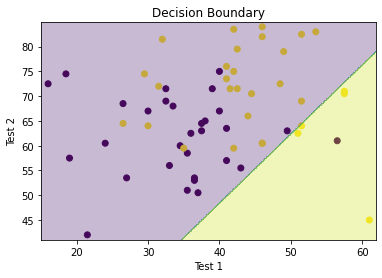

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt

# Plot the training data
plt.scatter(X_train[:, 1], X_train[:, 2], c=y_train)

# Define the range of x and y values
x_min, x_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
y_min, y_max = X_train[:, 2].min() - 1, X_train[:, 2].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# Create a meshgrid of the feature space and predict the output for each point
Z = np.round(logistic_regression(np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()], theta))
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.3)

# Set the axis labels and title
plt.xlabel('Test 1')
plt.ylabel('Test 2')
plt.title('Decision Boundary')

# Show the plot
plt.show()


In [6]:
# (3) Using the best model, predict whether the students with following scores will be admitted or not:

# Preprocess the input data
X_pred = np.array([[1, 49.5, 55.0],
                   [1, 43.0, 74.0],
                   [1, 33.5, 70.5],
                   [1, 30.0, 78.0]])

# Make predictions using the trained model
y_pred = np.round(logistic_regression(X_pred, theta))

# Print the predictions
print("Prediction for (49.5, 55.0): ", "Admitted" if y_pred[0] == 1 else "Not Admitted")
print("Prediction for (43.0, 74.0): ", "Admitted" if y_pred[1] == 1 else "Not Admitted")
print("Prediction for (33.5, 70.5): ", "Admitted" if y_pred[2] == 1 else "Not Admitted")
print("Prediction for (30.0, 78.0): ", "Admitted" if y_pred[3] == 1 else "Not Admitted")

Prediction for (49.5, 55.0):  Admitted
Prediction for (43.0, 74.0):  Not Admitted
Prediction for (33.5, 70.5):  Not Admitted
Prediction for (30.0, 78.0):  Not Admitted
